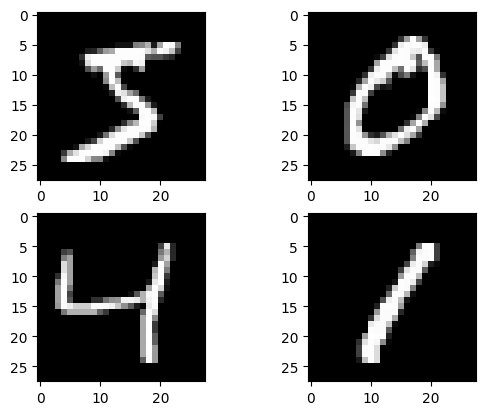

In [7]:
# Plot mnist instances
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()
# Try plotting a 5x5 grid of images 

In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# build the model
# create model
model = Sequential()
model.add(Dense(num_pixels, input_shape=(num_pixels,),
 kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes,
 kernel_initializer='normal', activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
 epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 4s 4ms/step - loss: 0.2826 - accuracy: 0.9194 - val_loss: 0.1402 - val_accuracy: 0.9596
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.1114 - accuracy: 0.9680 - val_loss: 0.0936 - val_accuracy: 0.9727
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0704 - accuracy: 0.9795 - val_loss: 0.0758 - val_accuracy: 0.9776
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9854 - val_loss: 0.0683 - val_accuracy: 0.9780
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0352 - accuracy: 0.9900 - val_loss: 0.0655 - val_accuracy: 0.9795
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0262 - accuracy: 0.9934 - val_loss: 0.0617 - val_accuracy: 0.9809
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9955 - val_loss: 0.0596 - val_accuracy: 0.9812
Epoch 

In [22]:
# Larger CNN Model
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# build the model
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])
# Fit the model
train_history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
 epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3672 - accuracy: 0.8854 - val_loss: 0.0723 - val_accuracy: 0.9767
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0945 - accuracy: 0.9710 - val_loss: 0.0449 - val_accuracy: 0.9852
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0708 - accuracy: 0.9778 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0556 - accuracy: 0.9830 - val_loss: 0.0334 - val_accuracy: 0.9883
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0465 - accuracy: 0.9856 - val_loss: 0.0271 - val_accuracy: 0.9911
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0421 - accuracy: 0.9870 - val_loss: 0.0359 - val_accuracy: 0.9868
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0374 - accuracy: 0.9882 - val_loss: 0.0274 - val_accuracy: 0.9902
Epoch 

In [24]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 15)          0         
                                                                 
 flatten_4 (Flatten)         (None, 375)              

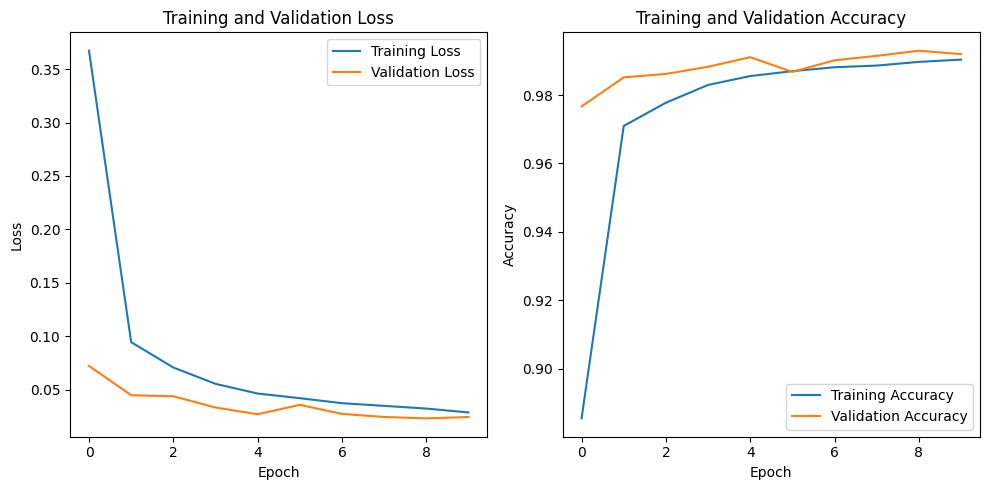

In [25]:
import matplotlib.pyplot as plt

# Extracting data
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
accuracy = train_history.history['accuracy']
val_accuracy = train_history.history['val_accuracy']

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plotting loss and validation loss
axs[0].plot(loss, label='Training Loss')
axs[0].plot(val_loss, label='Validation Loss')
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plotting accuracy and validation accuracy
axs[1].plot(accuracy, label='Training Accuracy')
axs[1].plot(val_accuracy, label='Validation Accuracy')
axs[1].set_title('Training and Validation Accuracy')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()


In [26]:
# Loading data and data preparation for CIFAR10.
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32')
# normalize inputs from 0-255 to 0-1. Take only 5k training images.
X_train = X_train[:5000] / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train[:5000])
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
########
# Importing VGG16 with pre-trained weights.
from tensorflow import keras
base_model = keras.applications.VGG16(weights='imagenet',
 input_shape=(32, 32, 3),
include_top=False)
# Freeze base model
base_model.trainable = False
# Create inputs with correct shape
inputs = keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)
# Add final dense layer
x = keras.layers.Dense(256, activation = 'relu')(x)
outputs = keras.layers.Dense(10, activation = 'softmax')(x)
# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy , metrics = ['accuracy'])
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
 epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

58889256/58889256 [==============================] - 4s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dense_18 (Dense)            (None, 10)                2570      
                                                                 
Total params: 14,848,586
Trainable params: 133,898
Non-trainab

In [29]:
# Larger CNN Model
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
# fix random seed for reproducibility
seed = 88
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3).astype('float32')
# normalize inputs from 0-255 to 0-1. Take only 5k training images.
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
# build the model
# create model
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy',
 optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test),
 epochs=10, batch_size=200, verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 30)        2280      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 12, 12, 15)        4065      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 15)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 15)          0         
                                                                 
 flatten_7 (Flatten)         (None, 540)              